In [1]:
import h5py
import numpy as np
import os
import sys

sys.path.append('../src')
import localmodule

In [84]:
data_dir = localmodule.get_data_dir()
dataset_name = localmodule.get_dataset_name()
units = localmodule.get_units()
features = ["logmelspec", "pcen"]

settings = localmodule.get_logmelspec_settings()
fmax = settings["fmax"]
fmin = settings["fmin"]
n_mels = settings["n_mels"]

mel_frequencies = librosa.mel_frequencies(
    n_mels=n_mels, fmin=fmin, fmax=fmax)

feature_str = features[0]
unit_str = units[0]
key_str = 'unit01_909020184_08329_1_original'

#for feature_str in features:
feature_name = "_".join([dataset_name, "clip-" + feature_str])
feature_dir = os.path.join(data_dir, feature_name, "original")

#for unit_str in units:
hdf5_name = "_".join([dataset_name, "original", unit_str])
hdf5_path = os.path.join(feature_dir, hdf5_name) + ".hdf5"
hdf5_file = h5py.File(hdf5_path)
hdf5_group = hdf5_file[feature_str]
hdf5_keys = list(hdf5_group.keys())

#for key_str in hdf5_keys
key_parts = key_str.split("_")
freq_str = key_parts[2]
freq_hz = int(freq_str)
hdf5_key = hdf5_group[key_str]
tfr = hdf5_key[:]


%matplotlib inline
import librosa.display
from matplotlib import pyplot as plt

#plt.hist(np.ravel(hdf5_key[:]), bins=1000);

In [49]:
bin_id = np.argmin(np.abs(mel_frequencies - freq_hz))

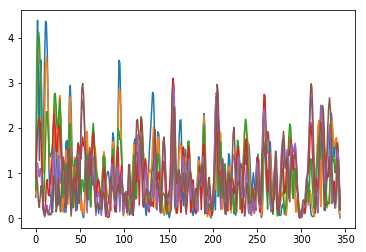

In [63]:
plt.plot(tfr[(-bin_id)+ range(-3,3), :].T)

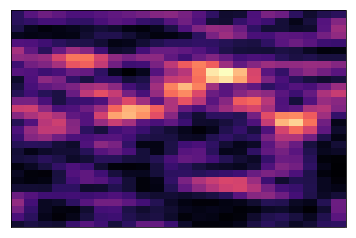

In [78]:
librosa.display.specshow(tfr[bin_id-30:bin_id, 160:184])

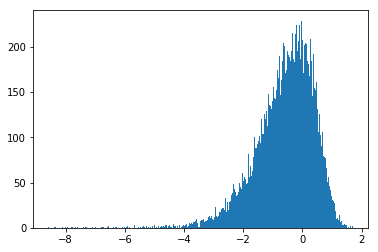

In [83]:
plt.hist(np.ravel(np.log(tfr)), bins=1000);

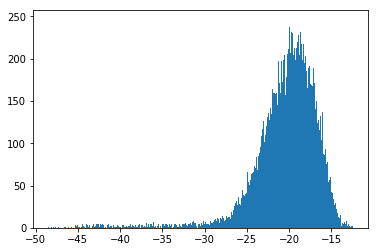